In [2]:
import pickle as pkl
import pk_plot_library as pplib
import numpy as np
DRAFTPATH = '/Users/cosinga/code/hicolor_draft_two/figures/'
SAVEPATH = '/Users/cosinga/code/hcolor/fig_md_analysis/rvb/'
pplib.imports()

In [3]:
ds = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/9-27_datasort.pkl', 'rb'))

ds.tickArgs(direction = 'in', labelsize = 14)
ds.legendArgs(frameon = False, loc = 'upper right', fontsize = 12, slc = (-1, -1))

ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 16, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 16, ha = 'center', va = 'top')

ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])
ds.axisLabelArgs('both', fontsize = 16)
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.setOrder('snapshot', [99, 67, 50])

ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Particles in Galaxies'])
ds.displayAs('snapshot', [99, 67, 50], ['z = 0.0', 'z = 0.5', 'z = 1.0'])
ds.displayAs('color', ['red', 'blue', 'resolved', 'ratio'],
            ['HI $\\times$ Red\nCross-Power', 'HI $\\times$ Blue\nCross-Power',
            'HI $\\times$ Galaxy\nCross-Power', r'Color Ratio'])
ds.displayAs('post_process', ['corr_coef', 'theory_bias', 'obs_bias'], 
             ['r', '$b_{\\mathrm{th}}$', '$b_{\\mathrm{obs}}$'])

ds.setColors('post_process', ['pink', 'lime', 'cyan'], ['corr_coef', 'theory_bias', 'obs_bias'])
ds.setColors('color', ['red', 'blue', 'gray'], ['red', 'blue', 'resolved'])
ds.setColors('space', ['green', 'orange'], ['real', 'redshift'])
ds.setColors('HI_fieldname', ['firebrick', 'saddlebrown', 'sandybrown'], ['vn', 'hiptl', 'hisubhalo'])
snapshots = ds.getAttrVals('snapshot')
snapshots.sort()
snapshots.reverse()
ds.setColors('snapshot', 'viridis', snapshots)

ds.setXLabel(pplib.wnum())

# Investigate

## Compare the cross-powers across colors

The row values for space: ['real', 'redshift']
The column values for snapshot: [99, 67, 50]


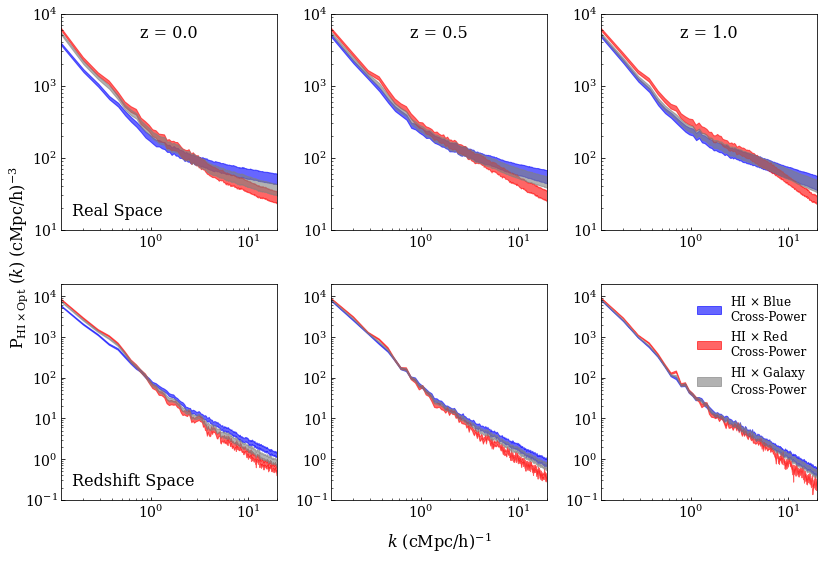

In [4]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'path':'fiducial', 'mas':'CICW', 'post_process':'no key found',
     'color':['blue', 'red', 'resolved'], 'space':['real', 'redshift']}

fg = ds.figrid('color', 'space', 'snapshot', ip)
fg.autoFill(alpha = 0.6)
fg.axisArgs(ylim = (10, 1e4), slc = 'real')
fg.axisArgs(ylim = (0.1, 2e4), slc = 'redshift')
fg.axisArgs(ylim = (0.01, 2), slc = 'rsd')
fg.setYLabel(pplib.pklab('HI', 'Opt'))
fg.plot()

The row values for : ['no key found']
The column values for snapshot: [99, 67, 50]


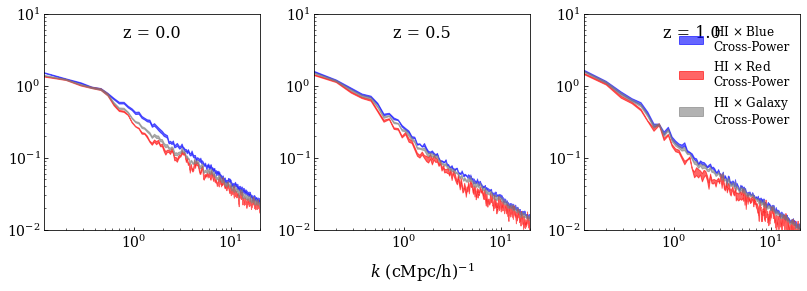

In [5]:
fg = ds.figrid('color', '', 'snapshot', ip)
fg.autoNorm({'space':'real'}, ['color', 'model', 'HI_fieldname'])
fg.autoFill()
fg.axisArgs(ylim = (1e-2, 1e1))
fg.plot()

### Z = 2.0 updates

* There are not nearly enough red galaxies to make any reasonable correlation
* Blue and All galaxies cases overlap at z = 2.0

## Directly compare redshifts for the cross-powers

The row values for space: ['real', 'redshift']
The column values for color: ['blue', 'red', 'resolved']


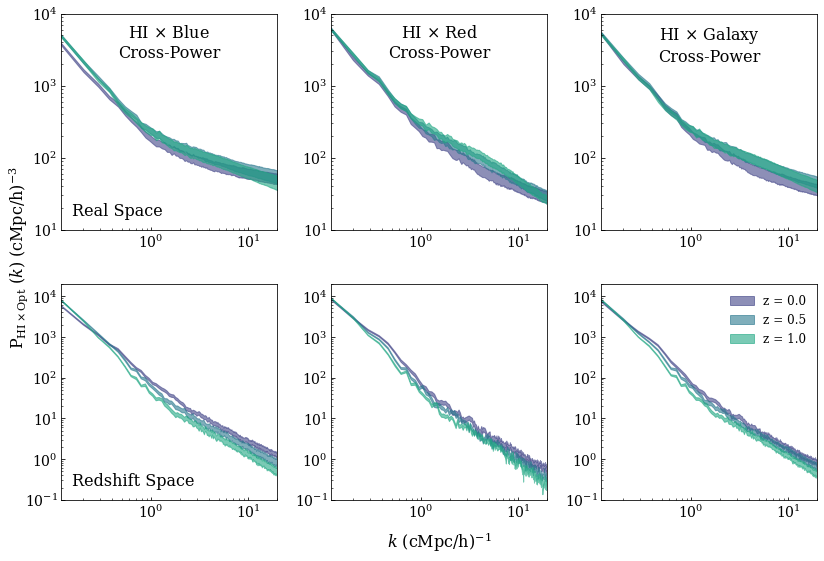

In [6]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'gal_res':'diemer', 'snapshot':[99, 67, 50],
      'gal_species':'stmass', 'sim_resolution':'high', 
      'path':'fiducial', 'mas':'CICW', 'post_process':'no key found',
     'color':['blue', 'red', 'resolved'], 'space':['real', 'redshift']}

fg = ds.figrid('snapshot', 'space', 'color', ip)
fg.autoFill(alpha = 0.6)
fg.axisArgs(ylim = (10, 1e4), slc = 'real')
fg.axisArgs(ylim = (0.1, 2e4), slc = 'redshift')
fg.axisArgs(ylim = (0.01, 2), slc = 'rsd')
fg.setYLabel(pplib.pklab('HI', 'Opt'))
fg.plot()

The row values for space: ['real', 'redshift']
The column values for color: ['blue', 'red', 'resolved']


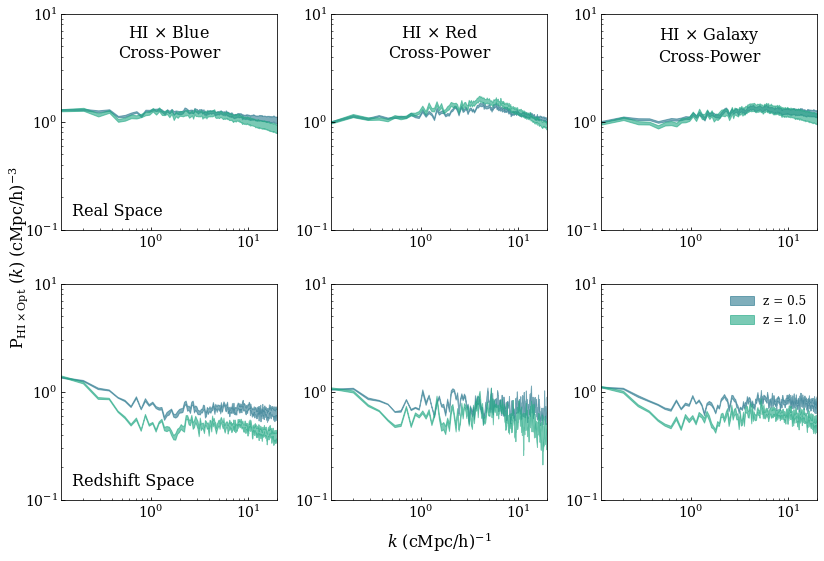

In [7]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'gal_res':'diemer', 'snapshot':[99, 67, 50],
      'gal_species':'stmass', 'sim_resolution':'high', 
      'path':'fiducial', 'mas':'CICW', 'post_process':'no key found',
     'color':['blue', 'red', 'resolved'], 'space':['real', 'redshift']}

fg = ds.figrid('snapshot', 'space', 'color', ip)
fg.autoNorm({'snapshot':99}, ['color', 'model', 'HI_fieldname'])
fg.autoFill(alpha = 0.6)
fg.axisArgs(ylim = (.1, 10), slc = 'real')
fg.axisArgs(ylim = (0.1, 10), slc = 'redshift')
fg.setYLabel(pplib.pklab('HI', 'Opt'))
fg.plot()

### z = 2.0 Updates
* At z = 2 the normal expected redshift evolution in the real-space blue x HI returns
* Even in the HI x Galaxy cross-power, the z = 0 -> z = 0.5 is inverse of what is expected - in this case, it's due to HI evolution rather than galaxies.

## Bias + Correlation Coefficients - Comparing Colors

The row values for post_process: ['corr_coef', 'obs_bias', 'theory_bias']
The column values for snapshot: [99, 67, 50]


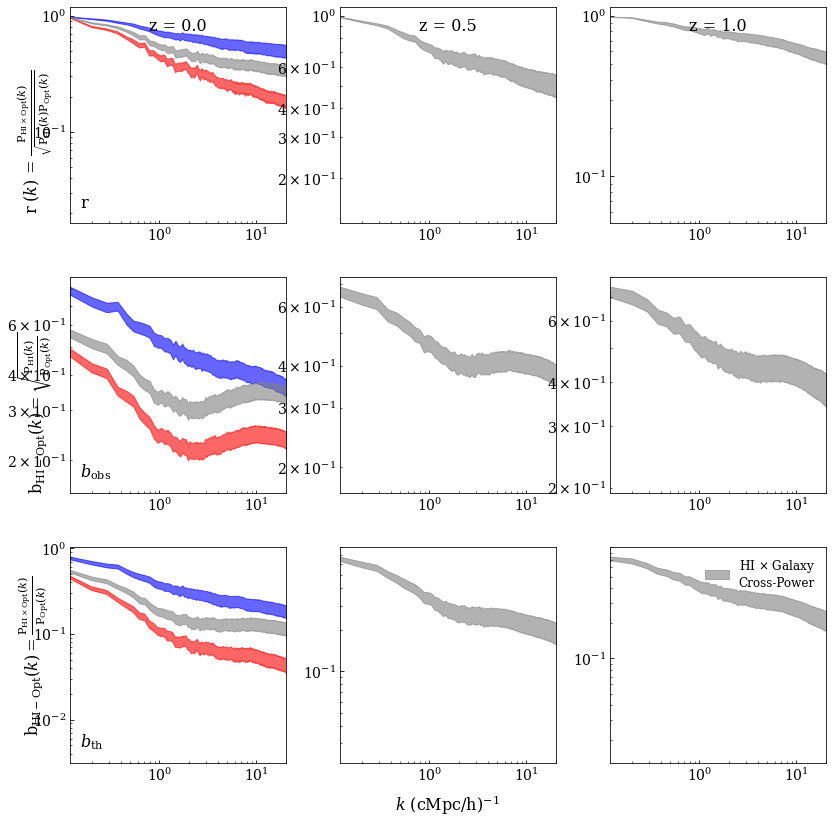

In [8]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'path':'fiducial', 'mas':'CICW', 'post_process':['corr_coef', 'obs_bias', 'theory_bias'],
     'color':['blue', 'red', 'resolved'], 'space':'real', 'denominator':['no key found', 'galaxy']}

fg = ds.figrid('color', 'post_process', 'snapshot', ip)
fg.autoFill(alpha = 0.6)
labels = [pplib.cclab('HI', 'Opt'), pplib.obsbiaslab('HI', 'Opt'), pplib.thbiaslab('HI', 'Opt')]
fg.setYLabel(labels, panels = [0, 1, 2])
fg.plot()

* only showing in real space, since we care about that much more.
* Plot number of each color galaxy with redshift w/wout dust

## Comparing the two bias definitions

The row values for color: ['blue', 'red', 'resolved']
The column values for snapshot: [99, 67, 50]


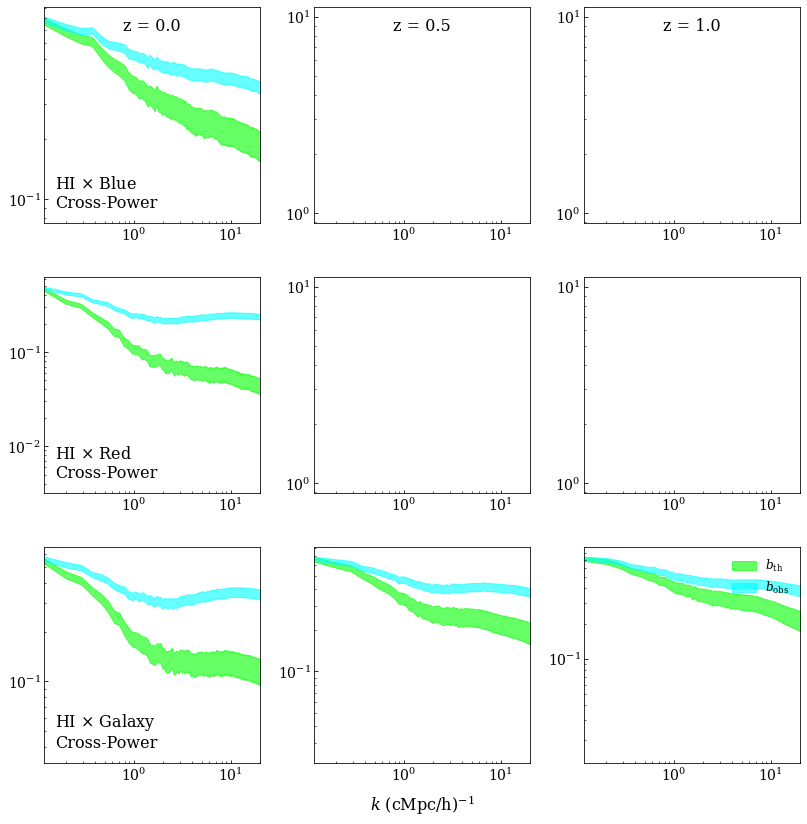

In [9]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'path':'fiducial', 'mas':'CICW', 'post_process':['obs_bias', 'theory_bias'],
     'color':['blue', 'red', 'resolved'], 'space':'real', 'denominator':['no key found', 'galaxy']}

fg = ds.figrid('post_process', 'color', 'snapshot', ip)
fg.autoFill(alpha = 0.6)
fg.plot()

## Compare these to the cross-powers that use hisubhalo

The row values for color: ['blue', 'red', 'resolved']
The column values for snapshot: [99, 67, 50]


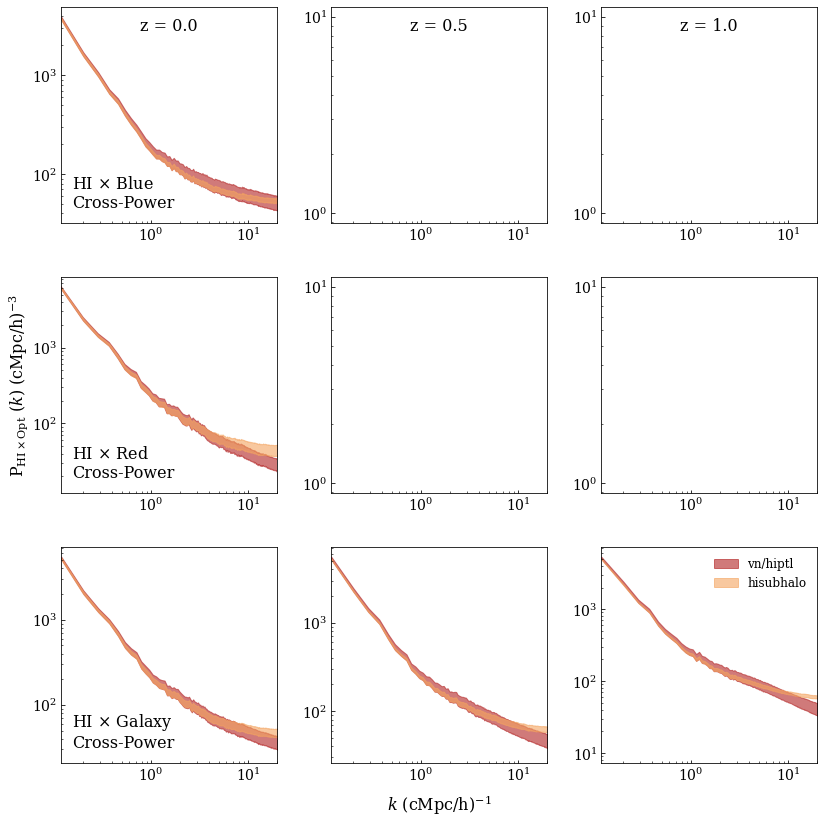

In [10]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl', 'hisubhalo'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'path':'fiducial', 'mas':'CICW', 'post_process':'no key found',
     'color':['blue', 'red', 'resolved'], 'space':'real',
     'is_groupcat':[True, 'False_True']}

fg = ds.figrid( 'is_groupcat', 'color', 'snapshot', ip)
fg.plotArgs(True, label = 'hisubhalo', color = 'sandybrown')
fg.plotArgs('False_True', label = 'vn/hiptl', color = 'firebrick')
fg.autoFill(alpha = 0.6)
fg.setYLabel(pplib.pklab('HI', 'Opt'))
fg.plot()

## Galaxy Auto Powers

The row values for space: ['real', 'redshift', 'rsd']
The column values for snapshot: [99, 67, 50]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


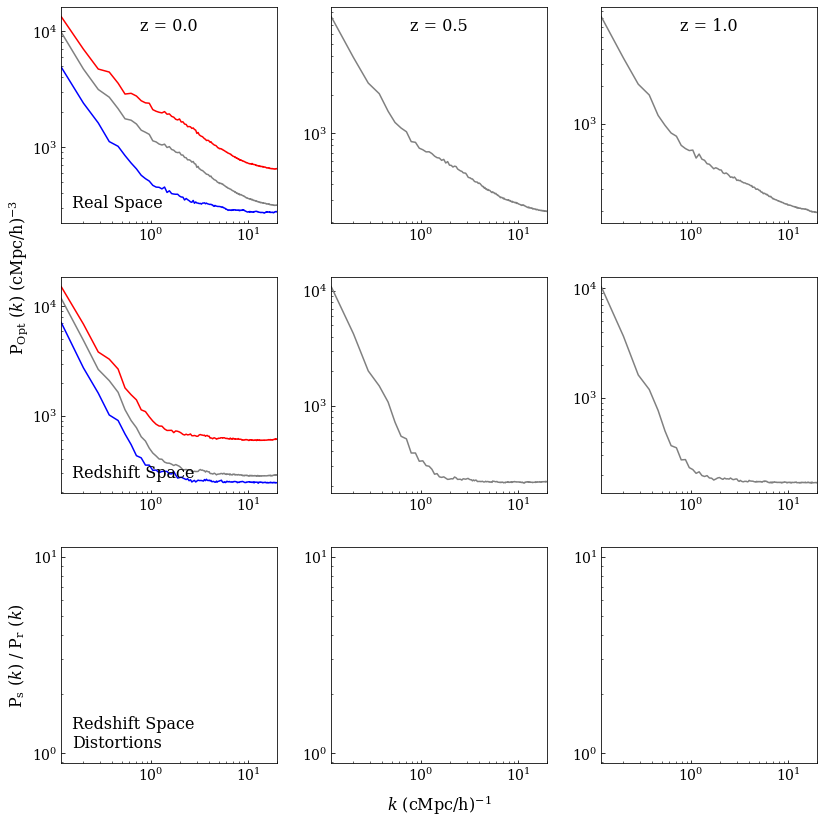

In [11]:
ds.displayAs('color', ['red', 'blue', 'resolved', 'ratio'],
            ['Red Galaxies', 'Blue Galaxies',
            'All Galaxies', r'Color Ratio'])
ip = {'is_auto':True, 'path':'fiducial', 'color_cut':['0.60', 'None'], 'color':['blue', 'red', 'resolved'],
     'fieldname':'galaxy', 'simname':'tng100', 'gal_res':'diemer'}
fg = ds.figrid('color', 'space', 'snapshot', ip)
fg.setYLabel([pplib.pklab('Opt'), pplib.pkrat('s', 'r')], panels = [slice(0, 2), slice(2, 3)])
fg.plot()

* z = 2 the red galaxy auto power spectrum is nearly all noise, blue and all galaxies are on top of one another

In [12]:
ds.displayAs('color', ['red', 'blue', 'resolved', 'ratio'],
            ['HI $\\times$ Red\nCross-Power', 'HI $\\times$ Blue\nCross-Power',
            'HI $\\times$ Galaxy\nCross-Power', r'Color Ratio'])

## Comparing to Anderson 2018

In [14]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'snapshot':99, 'color_cut':'0.60', 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'post_process':['no key found'],
     'color':['blue', 'red'], 'space':['redshift']}
fg = ds.figrid('color', '', '', ip)
fg.plotArgs({'color':'blue'}, color = 'blue')
fg.plotArgs({'color':'red'}, color = 'red')
fg.legendArgs(rm_legend = True)
fg.autoFill(alpha = 0.6)
fg.setYLabel('P (k)')
fg.axisArgs(ylim = (0.1, 1e4))



# fg.axes[0,0].errorbar(ablue[:, 0], ablue[:, 1], yerr = blueerr, color = 'cyan', linestyle = 'None', marker = 'o')
# fg.axes[0,0].errorbar(ared[:, 0], ared[:,1], yerr = rederr, color = 'pink', linestyle = 'None', marker = 'o')

The row values for : ['no key found']
The column values for : ['no key found']


The row values for : ['no key found']
The column values for : ['no key found']


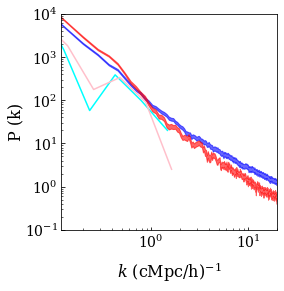

In [15]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'snapshot':99, 'color_cut':'0.60', 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'post_process':['no key found'],
     'color':['blue', 'red'], 'space':['redshift']}
fg = ds.figrid('color', '', '', ip)
fg.plotArgs({'color':'blue'}, color = 'blue')
fg.plotArgs({'color':'red'}, color = 'red')
fg.legendArgs(rm_legend = True)
fg.autoFill(alpha = 0.6)
fg.setYLabel('P (k)')
fg.axisArgs(ylim = (0.1, 1e4))

ared = np.loadtxt('../anderson_red.txt', delimiter = ',')
ared[:,1] = ared[:, 1] * 2 * np.pi**2 / ared[:,0]**3 / 0.000064
ablue = np.loadtxt('../anderson_blue.txt', delimiter = ',')
ablue[:,1] = ablue[:, 1] * 2 * np.pi**2 / ablue[:,0]**3 / 0.000064
fg.plot()
fg.axes[0,0].plot(ablue[:, 0], ablue[:, 1], color = 'cyan')
fg.axes[0,0].plot(ared[:, 0], ared[:,1], color = 'pink')

# Paper Figures

## HI x Galaxy Results at z = 0.0

The row values for post_process: ['no key found', 'corr_coef']
The column values for space: ['real', 'redshift']


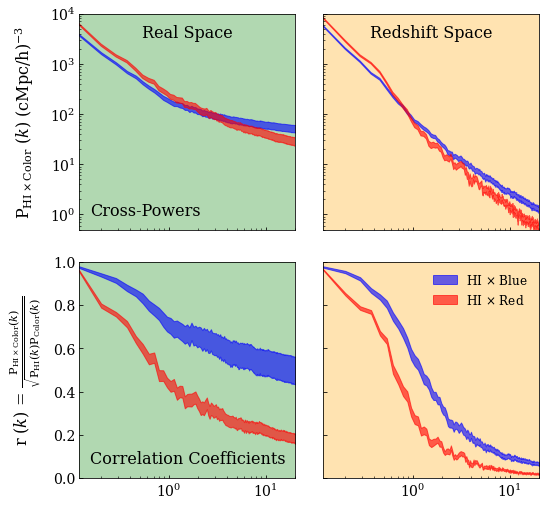

In [11]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'snapshot':99, 'color_cut':'0.60', 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'post_process':['no key found', 'corr_coef'],
     'color':['blue', 'red'], 'space':['real', 'redshift']}

fg = ds.figrid('color', 'post_process', 'space', ip)
fg.gspecArgs(hspace = 0.15, wspace = 0.13, xborder = [0.25, 0.25], yborder = [0, 0.25])
fg.rowLabels(['Cross-Powers', 'Correlation Coefficients'])
fg.axisArgs(slc = 'real', facecolor = pplib.rgba('green', 0.6/2), ylim = (.5, 1e4))
fg.axisArgs(slc = 'redshift', facecolor = pplib.rgba('orange', 0.6/2), ylim = (.5, 1e4))
fg.axisArgs(slc = 'corr_coef', yscale = 'linear', ylim = (0, 1))
fg.setDefaultTicksParams()
fg.plotArgs({'color':'blue'}, label = 'HI $\\times$ Blue')
fg.plotArgs({'color':'red'}, label = 'HI $\\times$ Red')
fg.legendArgs(loc = 'upper right', slc = (1, 1))
defpos = fg._defaultAxLabelPos('y', slc = slice(0, fg.dim[1]))
y1 = 1 - (fg.gspec_args['yborder'][0] + 1.5) / fg.calculateFigsize()[1]
y2 = (fg.gspec_args['yborder'][1] + 2) / fg.calculateFigsize()[1]
fg.setXLabel('')
fg.annotateFig(pplib.pklab('HI', 'Color'), [defpos[0], y1], fontsize = 16, va = 'center', ha = 'center', rotation = 'vertical')
fg.annotateFig(pplib.cclab('HI', 'Color'), [defpos[0], y2], fontsize = 16, va = 'center', ha = 'center', rotation = 'vertical')
# fg.annotatePanel('z = 0.0', [0.95, 0.95], (1, 1), fontsize = 14, va = 'top', ha = 'right')
fg.autoFill(alpha = 0.6)
fg.plot()

The row values for post_process: ['no key found', 'corr_coef']
The column values for : ['no key found']


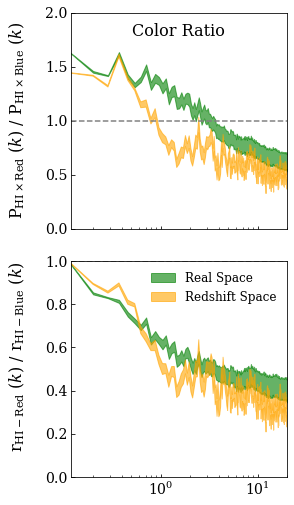

In [12]:
ip = {'post_process':['no key found', 'corr_coef'], 'color':['blue', 'red'], 'snapshot':99, 'HI_fieldname':['vn', 'hiptl'],
     'space':['real', 'redshift'], 'simname':'tng100', 'path':'fiducial'}

ratfg = ds.figrid('space', 'post_process', '', ip)
ratfg.autoNorm({'color':'blue'}, ['model', 'HI_fieldname', 'space'])
ratfg.plotArgs({'space':'redshift'}, {'label':'Redshift Space'})
ratfg.autoFill(alpha = 0.6)
ratfg.rowLabels(['', ''])
ratfg.setXLabel('')
ratfg.colLabels(['Color Ratio'], pos = [0.5, 0.95])
ratfg.colLabelArgs(fontsize = 16)
ratfg.setDefaultTicksParams()
ratfg.gspecArgs(hspace = 0.15, xborder = [0.25, 0], yborder = [0, 0.25])
ratfg.axisArgs(yscale = 'linear', ylim = (0, 2))
ratfg.axisArgs(slc = 'corr_coef', ylim = (0, 1))
ratfg.annotateFig(pplib.pkrat('\\mathrm{HI} \\times \\mathrm{Red}', '\\mathrm{HI} \\times \\mathrm{Blue}', rm = False),
               [defpos[0], y1], fontsize = 16, va = 'center', ha = 'center', rotation = 'vertical')
ratfg.annotateFig(pplib.ccrat('HI-Red', 'HI-Blue'), [defpos[0], y2+.025], fontsize = 16, va = 'center', ha = 'center', rotation = 'vertical')
ratfg.plotOnes()
ratfg.plot()


<Axes.ArtistList of 2 collections>


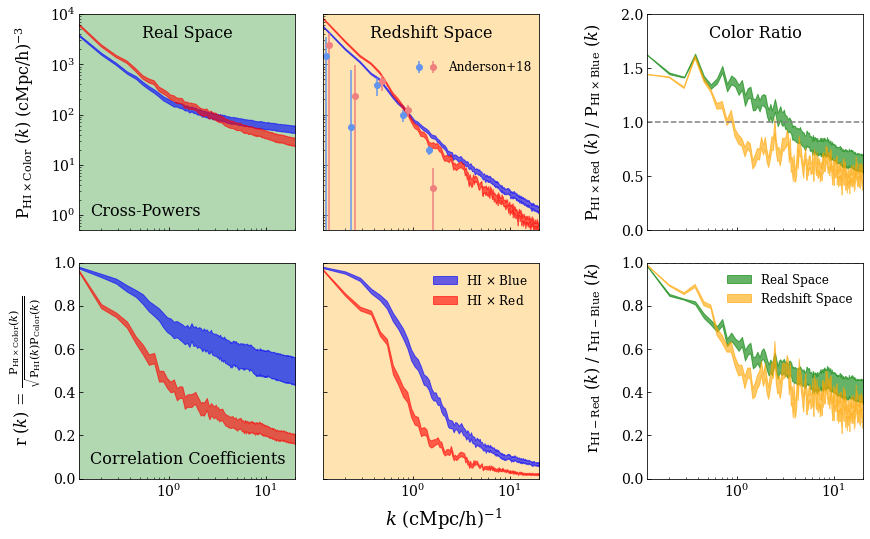

In [13]:
from matplotlib.legend_handler import HandlerTuple
fig = fg.combine([fg, ratfg])
fig.text(0.5, 0.05, pplib.wnum(), ha = 'center', va = 'top', fontsize = 18)


ablue = np.loadtxt('../anderson_blue.txt', delimiter = ',')
ablue[:,1] = ablue[:, 1] * 2 * np.pi**2 / ablue[:,0]**3 / 0.000064

# ablue has the most correct k values, use that for the other values too
aredup = np.loadtxt('../anderson_red_upper_lim.txt', delimiter = ',')
aredup[:,1] = aredup[:, 1] * 2 * np.pi**2 / ablue[:,0]**3 / 0.000064
ablueup = np.loadtxt('../anderson_blue_upper_lim.txt', delimiter = ',')
ablueup[:,1] = ablueup[:, 1] * 2 * np.pi**2 / ablue[:,0]**3 / 0.000064
ared = np.loadtxt('../anderson_red.txt', delimiter = ',')
ared[:,1] = ared[:, 1] * 2 * np.pi**2 / ablue[:,0]**3 / 0.000064

aredlow = np.loadtxt('../anderson_red_low_lim.txt', delimiter = ',')
aredlow[:,1] = aredlow[:,1]* 2 * np.pi**2 / ablue[:,0]**3 / 0.000064
abluelow = np.loadtxt('../anderson_blue_low_lim.txt', delimiter = ',')
abluelow[:,1] = abluelow[:,1]* 2 * np.pi**2 / ablue[:,0]**3 / 0.000064


blueerr = np.zeros((2, len(ablueup[:, 1])))
rederr = np.zeros_like(blueerr)
blueerr[0, :] = ablue[:,1] - abluelow[:,1]
blueerr[0, 1:3] = ablue[1:3,1]
blueerr[1, :] = ablueup[:,1] - ablue[:,1]
rederr[0,:] = ared[:,1] - aredlow[:,1]
rederr[0, :3] = ared[:3, 1]
rederr[0,-1] = ared[-1, 1]
rederr[1,:] = aredup[:, 1] - ared[:,1]

ax = fg.axes[0, 1]
lines = ax.collections
print(lines)

l1 = ax.errorbar(ablue[:,0], ablue[:,1], yerr = blueerr, color = 'cornflowerblue', linestyle = 'none', marker = 'o')
l2 = ax.errorbar(ared[:,0], ared[:,1], yerr = rederr, color = 'lightcoral', linestyle = 'none', marker = 'o')
ax.legend([(l1,l2)], ['Anderson+18'], frameon = False, fontsize = 12, loc = [0.4, 0.7],
               handler_map={tuple: HandlerTuple(ndivide=None)})


The row values for : ['no key found']
The column values for : ['no key found']


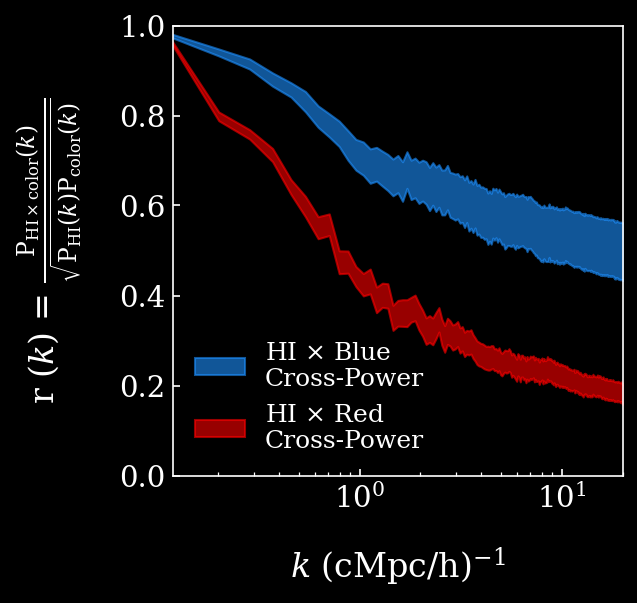

In [14]:
ip['post_process'] = 'corr_coef'
ip['space'] = 'real'
fg = ds.figrid('color', '', '', ip)
fg.plotArgs({'color':'red'}, color='red')
fg.plotArgs({'color':'blue'}, color='dodgerblue')
fg.figArgs(dpi = 150)
fg.gspecArgs(xborder = [0.35, 0])
fg.autoFill()
fg.setYLabel(pplib.cclab('HI', 'color'))
fg.axisArgs(yscale = 'linear', ylim = [0, 1])
fg.legendArgs(loc = 'lower left')
pplib.darkmode(fg)
fg.plot()

The row values for post_process: ['no key found', 'corr_coef']
The column values for space: ['real', 'redshift']


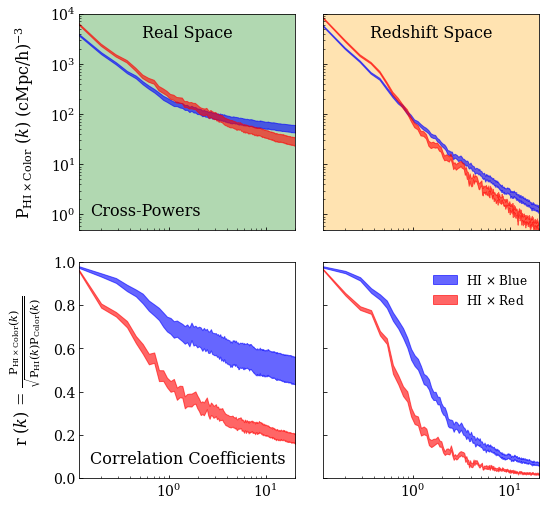

In [15]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'snapshot':99, 'color_cut':'0.60', 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'post_process':['no key found', 'corr_coef'],
     'color':['blue', 'red'], 'space':['real', 'redshift']}

fg = ds.figrid('color', 'post_process', 'space', ip)
fg.gspecArgs(hspace = 0.15, wspace = 0.13, xborder = [0.25, 0.25], yborder = [0, 0.25])
fg.rowLabels(['Cross-Powers', 'Correlation Coefficients'])
fg.axisArgs(slc = (0,0), facecolor = pplib.rgba('green', 0.6/2), ylim = (.5, 1e4))
fg.axisArgs(slc = (0,1), facecolor = pplib.rgba('orange', 0.6/2), ylim = (.5, 1e4))
fg.axisArgs(slc = 'corr_coef', yscale = 'linear', ylim = (0, 1))
fg.setDefaultTicksParams()
fg.plotArgs({'color':'red'}, label = 'HI $\\times$ Red')
fg.plotArgs({'color':'blue'}, label = 'HI $\\times$ Blue')

fg.legendArgs(loc = 'upper right', slc = (1, 1))
defpos = fg._defaultAxLabelPos('y', slc = slice(0, fg.dim[1]))
y1 = 1 - (fg.gspec_args['yborder'][0] + 1.5) / fg.calculateFigsize()[1]
y2 = (fg.gspec_args['yborder'][1] + 2) / fg.calculateFigsize()[1]
fg.setXLabel('')
fg.annotateFig(pplib.pklab('HI', 'Color'), [defpos[0], y1], fontsize = 16, va = 'center', ha = 'center', rotation = 'vertical')
fg.annotateFig(pplib.cclab('HI', 'Color'), [defpos[0], y2], fontsize = 16, va = 'center', ha = 'center', rotation = 'vertical')
# fg.annotatePanel('z = 0.0', [0.95, 0.95], (1, 1), fontsize = 14, va = 'top', ha = 'right')
fg.autoFill(alpha = 0.6)
fg.plot()

The row values for post_process: ['no key found', 'corr_coef']
The column values for : ['no key found']


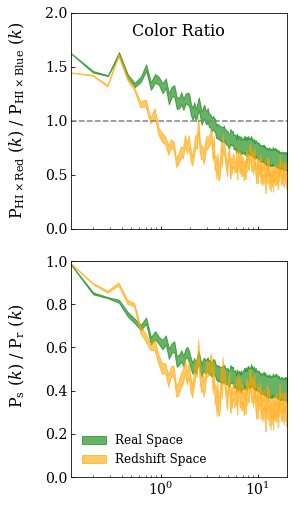

In [16]:
ip = {'post_process':['no key found', 'corr_coef'], 'color':['blue', 'red'], 'snapshot':99, 'HI_fieldname':['vn', 'hiptl'],
     'space':['real', 'redshift'], 'simname':'tng100', 'path':'fiducial'}

ratfg = ds.figrid('space', 'post_process', '', ip)
ratfg.autoNorm({'color':'blue'}, ['model', 'HI_fieldname', 'space'])
ratfg.plotArgs({'space':'redshift'}, {'label':'Redshift Space'})
ratfg.autoFill(alpha = 0.6)
ratfg.rowLabels(['', ''])
ratfg.setXLabel('')
ratfg.legendArgs(loc = 'lower left')
ratfg.colLabels(['Color Ratio'], pos = [0.5, 0.95])
ratfg.colLabelArgs(fontsize = 16)
ratfg.setDefaultTicksParams()
ratfg.gspecArgs(hspace = 0.15, xborder = [0.25, 0], yborder = [0, 0.25])
ratfg.axisArgs(yscale = 'linear', ylim = (0, 2))
ratfg.axisArgs(slc = 'corr_coef', ylim = (0, 1))
ratfg.annotateFig(pplib.pkrat('\\mathrm{HI} \\times \\mathrm{Red}', '\\mathrm{HI} \\times \\mathrm{Blue}', rm = False),
               [defpos[0], y1], fontsize = 16, va = 'center', ha = 'center', rotation = 'vertical')
ratfg.annotateFig(pplib.pkrat('s', 'r'), [defpos[0], y2+.025], fontsize = 16, va = 'center', ha = 'center', rotation = 'vertical')
ratfg.plotOnes()
ratfg.plot()

The row values for : ['no key found']
The column values for : ['no key found']


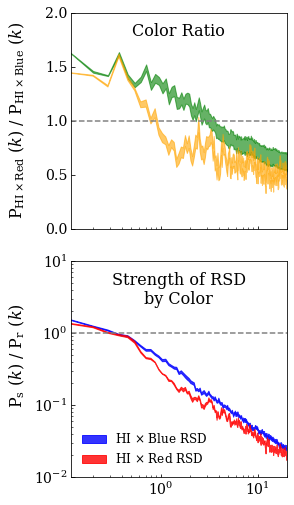

<Figure size 270x291.6 with 0 Axes>

In [17]:
ip = {'is_auto':False, 'color_cut':'0.60', 'space':['real', 'redshift'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['blue', 'red'], 'post_process':'no key found', 'snapshot':99,
     'simname':'tng100'}
onefg = ds.figrid('color', '', '', ip)
onefg.autoNorm({'space':'real'}, ['model', 'snapshot', 'HI_fieldname', 'color'])
onefg.plotArgs({'color':'blue'}, {'label':'HI $\\times$ Blue RSD', 'color':'blue'})
onefg.plotArgs({'color':'red'}, {'label':'HI $\\times$ Red RSD', 'color':'red'})
onefg.autoFill({'alpha':0.8})
onefg.axisArgs(ylim = (.01, 10))
onefg.legendArgs(loc = 'lower left')
onefg.annotatePanel('Strength of RSD\nby Color', [0.5, 0.95], (0,0), ha = 'center', va = 'top', fontsize = 16)
onefg.gspecArgs(yborder = [0.1, 0.25])
onefg.setXLabel('')

onefg.plotOnes()
ratfg.axes[1, 0].clear()
ax = np.array([ratfg.axes[1, 0]], dtype = object).reshape((1,1))
onefg.plot(axes = ax)
ratfg.fig

The row values for : ['no key found']
The column values for : ['no key found']
<Axes.ArtistList of 2 collections>


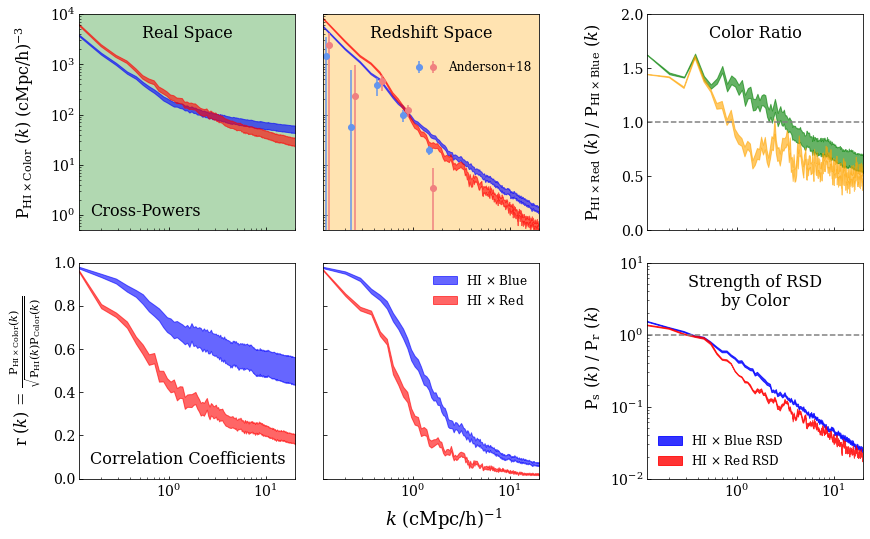

<Figure size 270x291.6 with 0 Axes>

In [18]:
fig = fg.combine([fg, ratfg])
fig.text(0.5, 0.05, pplib.wnum(), ha = 'center', va = 'top', fontsize = 18)
ip = {'is_auto':False, 'color_cut':'0.60', 'space':['real', 'redshift'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['blue', 'red'], 'post_process':'no key found', 'snapshot':99,
     'simname':'tng100'}
onefg = ds.figrid('color', '', '', ip)
onefg.autoNorm({'space':'real'}, ['model', 'snapshot', 'HI_fieldname', 'color'])
onefg.plotArgs({'color':'blue'}, {'label':'HI $\\times$ Blue RSD', 'color':'blue'})
onefg.plotArgs({'color':'red'}, {'label':'HI $\\times$ Red RSD', 'color':'red'})
onefg.autoFill({'alpha':0.8})
onefg.axisArgs(ylim = (.01, 10))
onefg.legendArgs(loc = 'lower left')
onefg.annotatePanel('Strength of RSD\nby Color', [0.5, 0.95], (0,0), ha = 'center', va = 'top', fontsize = 16)
onefg.gspecArgs(yborder = [0.1, 0.25])
onefg.setXLabel('')

onefg.plotOnes()
ratfg.axes[1, 0].clear()
ax = np.array([ratfg.axes[1, 0]], dtype = object).reshape((1,1))
onefg.plot(axes = ax)

ablue = np.loadtxt('../anderson_blue.txt', delimiter = ',')
ablue[:,1] = ablue[:, 1] * 2 * np.pi**2 / ablue[:,0]**3 / 0.000064

# ablue has the most correct k values, use that for the other values too
aredup = np.loadtxt('../anderson_red_upper_lim.txt', delimiter = ',')
aredup[:,1] = aredup[:, 1] * 2 * np.pi**2 / ablue[:,0]**3 / 0.000064
ablueup = np.loadtxt('../anderson_blue_upper_lim.txt', delimiter = ',')
ablueup[:,1] = ablueup[:, 1] * 2 * np.pi**2 / ablue[:,0]**3 / 0.000064
ared = np.loadtxt('../anderson_red.txt', delimiter = ',')
ared[:,1] = ared[:, 1] * 2 * np.pi**2 / ablue[:,0]**3 / 0.000064

aredlow = np.loadtxt('../anderson_red_low_lim.txt', delimiter = ',')
aredlow[:,1] = aredlow[:,1]* 2 * np.pi**2 / ablue[:,0]**3 / 0.000064
abluelow = np.loadtxt('../anderson_blue_low_lim.txt', delimiter = ',')
abluelow[:,1] = abluelow[:,1]* 2 * np.pi**2 / ablue[:,0]**3 / 0.000064


blueerr = np.zeros((2, len(ablueup[:, 1])))
rederr = np.zeros_like(blueerr)
blueerr[0, :] = ablue[:,1] - abluelow[:,1]
blueerr[0, 1:3] = ablue[1:3,1]
blueerr[1, :] = ablueup[:,1] - ablue[:,1]
rederr[0,:] = ared[:,1] - aredlow[:,1]
rederr[0, :3] = ared[:3, 1]
rederr[0,-1] = ared[-1, 1]
rederr[1,:] = aredup[:, 1] - ared[:,1]

ax = fg.axes[0, 1]
lines = ax.collections
print(lines)

l1 = ax.errorbar(ablue[:,0], ablue[:,1], yerr = blueerr, color = 'cornflowerblue', linestyle = 'none', marker = 'o')
l2 = ax.errorbar(ared[:,0], ared[:,1], yerr = rederr, color = 'lightcoral', linestyle = 'none', marker = 'o')
ax.legend([(l1,l2)], ['Anderson+18'], frameon = False, fontsize = 12, loc = [0.4, 0.7],
               handler_map={tuple: HandlerTuple(ndivide=None)})

# fig.savefig(DRAFTPATH + "rvb_observations.pdf", dpi = 150, bbox_inches = 'tight')
# fig.savefig(SAVEPATH + 'rvb_observations.png', dpi = 150, bbox_inches = 'tight')

# fig.savefig(DRAFTPATH + "rvb_wrsd.pdf", dpi = 150, bbox_inches = 'tight')
# fig.savefig(SAVEPATH + 'rvb_wrsd.png', dpi = 150, bbox_inches = 'tight')


## Redshift Evolution Figure

The row values for space: ['real', 'redshift']
The column values for color: ['blue', 'red']


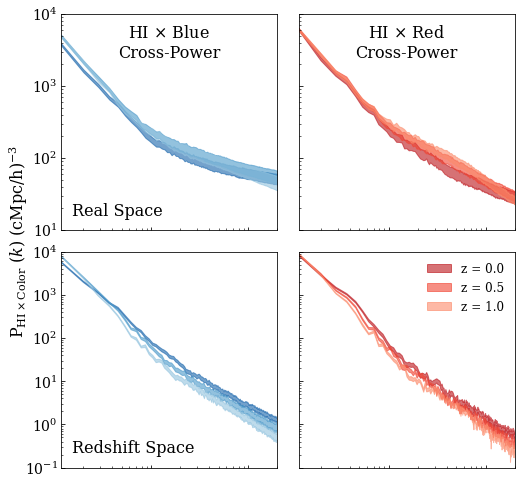

In [5]:
ip = {'is_auto':False, 'space':['real', 'redshift'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['blue', 'red'], 'post_process':'no key found', 'simname':'tng100',
     'snapshot':[99, 67, 50]}
fg = ds.figrid('snapshot', 'space', 'color', ip)
snapshots = ds.getAttrVals('snapshot')
snapshots.sort()
cmaps = {'blue':'Blues', 'red':'Reds'}
for col in ['blue', 'red']:
    fg.setCmap(cmaps[col], snapshots, {'color':col})

fg.autoFill(alpha = 0.6)
fg.axisArgs(slc = 'real', ylim = (10, 1e4))
fg.axisArgs(slc = 'redshift', ylim = (.1, 1e4))
fg.tickArgs(slc = 'red', labelleft = False)
XBORDER = [0.25, 0.1]
YBORDER = [0.25, 0.1]
fg.gspecArgs(xborder = XBORDER, yborder = YBORDER, wspace = 0.1, hspace = 0.1)
fg.tickArgs(labelbottom = False)
fg.setYLabel(pplib.pklab('HI', 'Color'))
fg.setXLabel('')
fg.plot()

The row values for space: ['real', 'redshift']
The column values for : ['no key found']
{'path': 'fiducial', 'result_runtime': 53.67548108100891, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'vn_galaxy', 'is_hydrogen': 'True_False', 'is_atomic': 'True_False', 'is_molecular': False, 'is_particle': 'True_False', 'is_groupcat': 'False_True', 'is_matter': 'False_True', 'mas': 'CICW', 'space': 'real', 'compute_xi': False, 'compute_slice': True, 'color': 'blue', 'gal_species': 'stmass', 'gal_res': 'diemer', 'color_cut': '0.60', 'map': 'mass', 'HI_fieldname': 'vn'}
[]
{'path': 'fiducial', 'result_runtime': 53.62093782424927, 'is_auto': False, 'box': 75.0, 'simname': 'tng100', 'sim_resolution': 'high', 'num_part': 1733600704, 'grid_resolution': 800, 'snapshot': 99, 'redshift': 2.220446049250313e-16, 'axis': 0, 'fieldname': 'vn_galaxy', 'is_

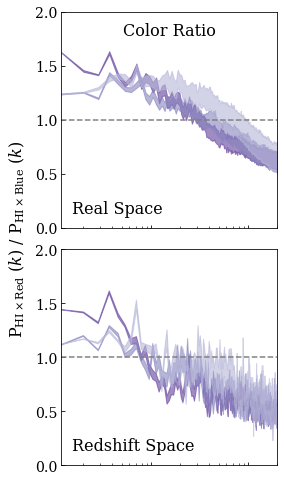

In [10]:
ip = {'is_auto':False, 'space':['real', 'redshift'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['blue', 'red'], 'post_process':'no key found', 'simname':'tng100',
     'snapshot':[99, 67, 50]}
ratfg = ds.figrid('snapshot', 'space', '', ip)
ratfg.autoNorm({'color':'blue'}, ['space', 'snapshot', 'model', 'HI_fieldname'])
ratfg.axisArgs(yscale = 'linear', ylim = (0, 2))
ratfg.plotOnes()
ratfg.colLabels(['Color Ratio'], pos = [0.5, 0.95])
ratfg.colLabelArgs(fontsize = 16)
ratfg.autoFill(alpha = 0.6)
ratfg.setCmap('Purples', snapshots)
ratfg.legendArgs(rm_legend = True)
ratfg.tickArgs(labelbottom = False)
ratfg.setXLabel('')
ratfg.gspecArgs(hspace = 0.1, yborder = YBORDER)
ratfg.setYLabel(pplib.pkrat('\\mathrm{HI} \\times \\mathrm{Red}', '\\mathrm{HI} \\times \\mathrm{Blue}', rm = False))
ratfg.plot()


The row values for : ['no key found']
The column values for color: ['blue', 'red']


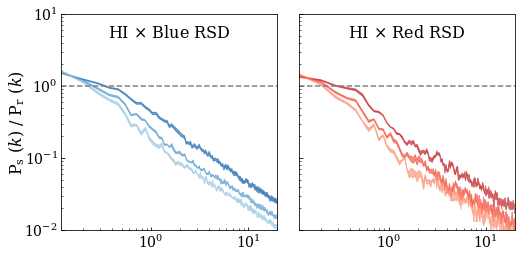

In [7]:
ip = {'is_auto':False, 'space':['real', 'redshift'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['blue', 'red'], 'post_process':'no key found', 'simname':'tng100',
     'snapshot':[99, 67, 50]}
rsdfg = ds.figrid('snapshot', '', 'color', ip)
rsdfg.autoNorm({'space':'real'}, ['model', 'HI_fieldname', 'color', 'snapshot'])
rsdfg.row_labels = ['']
for col in ['blue', 'red']:
    rsdfg.setCmap(cmaps[col], snapshots, {'color':col})
rsdfg.col_labels = ['HI $\\times$ Blue RSD', 'HI $\\times$ Red RSD']
rsdfg.autoFill(alpha = 0.6)
rsdfg.setXLabel('')
rsdfg.axisArgs(ylim = (.01, 10))
rsdfg.setDefaultTicksParams()
rsdfg.plotOnes()
rsdfg.setYLabel(pplib.pkrat('s', 'r'))
rsdfg.legendArgs(rm_legend = True)
rsdfg.colLabels([r'HI $\times$ Blue RSD', r'HI $\times$ Red RSD'])
rsdfg.gspecArgs(wspace = 0.1, xborder = XBORDER, yborder = [0.1, 0.25])
rsdfg.plot()

The row values for : ['no key found']
The column values for : ['no key found']


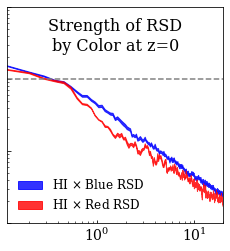

In [23]:
ip = {'is_auto':False, 'color_cut':'0.60', 'space':['real', 'redshift'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['blue', 'red'], 'post_process':'no key found', 'snapshot':99,
     'simname':'tng100'}
onefg = ds.figrid('color', '', '', ip)
onefg.autoNorm({'space':'real'}, ['model', 'snapshot', 'HI_fieldname', 'color'])
onefg.plotArgs({'color':'blue'}, {'label':'HI $\\times$ Blue RSD', 'color':'blue'})
onefg.plotArgs({'color':'red'}, {'label':'HI $\\times$ Red RSD', 'color':'red'})
onefg.autoFill({'alpha':0.8})
onefg.axisArgs(ylim = (.01, 10))
onefg.tickArgs(labelleft = False)
onefg.legendArgs(loc = 'lower left')
onefg.annotatePanel('Strength of RSD\nby Color at z=0', [0.5, 0.95], (0,0), ha = 'center', va = 'top', fontsize = 16)
onefg.gspecArgs(yborder = [0.1, 0.25])
onefg.setXLabel('')
onefg.plotOnes()
onefg.plot()

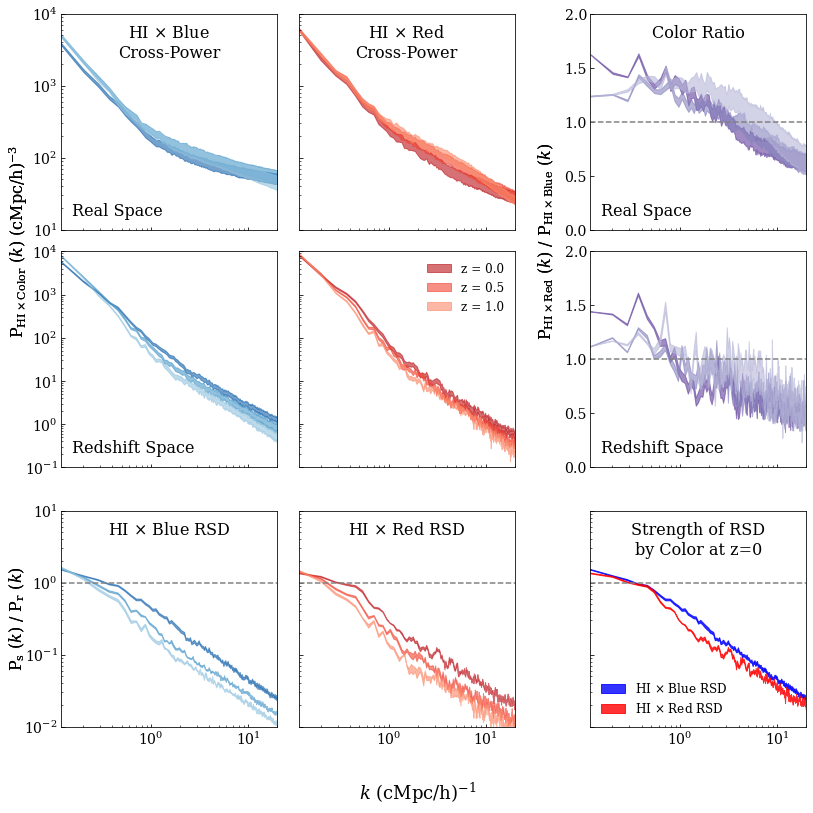

In [24]:
figarr = np.empty((2, 2), dtype = object)
figarr[0,0] = fg; figarr[1, 0] = rsdfg; figarr[0, 1] = ratfg; figarr[1, 1] = onefg
fig = fg.combine(figarr)
fig.text(0.5, 0, pplib.wnum(), ha = 'center', va = 'top', fontsize = 18)
fig.savefig(DRAFTPATH + 'rvb_zevo.pdf', dpi = 150, bbox_inches = 'tight')
fig.savefig(SAVEPATH + 'rvb_zevo.png', bbox_inches = 'tight')

The row values for space: ['real', 'redshift']
The column values for color: ['blue', 'red']


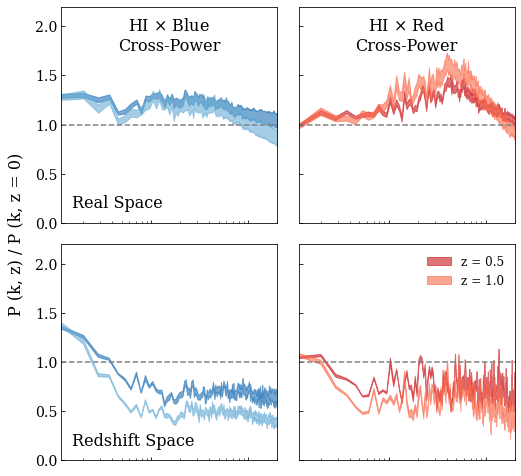

In [25]:
ip = {'is_auto':False, 'space':['real', 'redshift'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['blue', 'red'], 'post_process':'no key found', 'simname':'tng100',
     'snapshot':[99, 67, 50]}
fg = ds.figrid('snapshot', 'space', 'color', ip)
fg.autoNorm({'snapshot':99}, ['model'])
snapshots = ds.getAttrVals('snapshot')
snapshots.sort()
snapshots.remove(99)
cmaps = {'blue':'Blues', 'red':'Reds'}
for col in ['blue', 'red']:
    fg.setCmap(cmaps[col], snapshots, {'color':col})

fg.autoFill(alpha = 0.6)
fg.axisArgs(yscale = 'linear', ylim = (0, 2.2))
fg.tickArgs(slc = 'red', labelleft = False)
XBORDER = [0.25, 0.1]
YBORDER = [0.25, 0.1]
fg.gspecArgs(xborder = XBORDER, yborder = YBORDER, wspace = 0.1, hspace = 0.1)
fg.tickArgs(labelbottom = False)
label = r"P (k, z) / P (k, z = 0)"
fg.setYLabel(label)
fg.setXLabel('')
fg.plotOnes()
fg.plot()

The row values for : ['no key found']
The column values for color: ['blue', 'red']


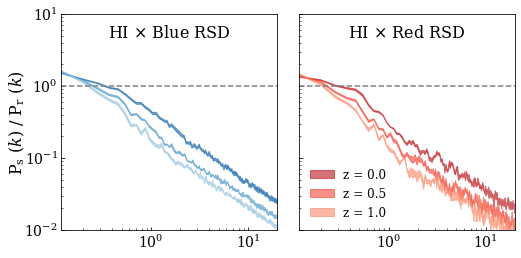

In [26]:
ip = {'is_auto':False, 'space':['real', 'redshift'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['blue', 'red'], 'post_process':'no key found', 'simname':'tng100',
     'snapshot':[99, 67, 50]}
rsdfg = ds.figrid('snapshot', '', 'color', ip)
rsdfg.autoNorm({'space':'real'}, ['model', 'HI_fieldname', 'color', 'snapshot'])
rsdfg.row_labels = ['']
snapshots = ds.getAttrVals('snapshot')
snapshots.sort()
for col in ['blue', 'red']:
    rsdfg.setCmap(cmaps[col], snapshots, {'color':col})
rsdfg.col_labels = ['HI $\\times$ Blue RSD', 'HI $\\times$ Red RSD']
rsdfg.autoFill(alpha = 0.6)
rsdfg.setXLabel('')

rsdfg.axisArgs(ylim = (.01, 10))
rsdfg.setDefaultTicksParams()
rsdfg.plotOnes()
rsdfg.setYLabel(pplib.pkrat('s', 'r'))
rsdfg.legendArgs(loc = 'lower left')
rsdfg.colLabels([r'HI $\times$ Blue RSD', r'HI $\times$ Red RSD'])
rsdfg.gspecArgs(wspace = 0.1, xborder = XBORDER, yborder = [0.1, 0.25])
rsdfg.plot()

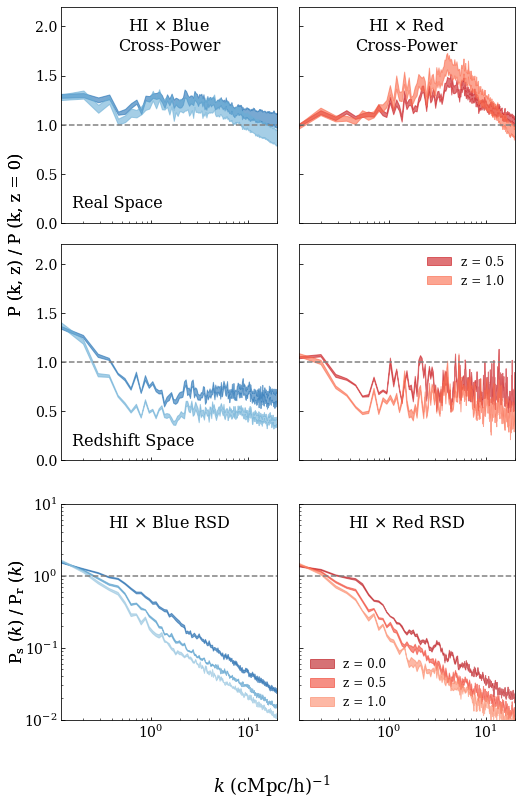

In [27]:
figarr = np.empty((2, 1), dtype = object)
figarr[0,0] = fg; figarr[1, 0] = rsdfg
fig = fg.combine(figarr)
fig.text(0.5, 0, pplib.wnum(), ha = 'center', va = 'top', fontsize = 18)
# fig.savefig(DRAFTPATH + 'rvb_zevo_ratios.pdf', dpi = 150, bbox_inches = 'tight')
# fig.savefig(SAVEPATH + 'rvb_zevo_ratios.png', dpi = 150, bbox_inches = 'tight')

## Trying with median instead

The row values for space: ['real', 'redshift']
The column values for color: ['blue', 'red']


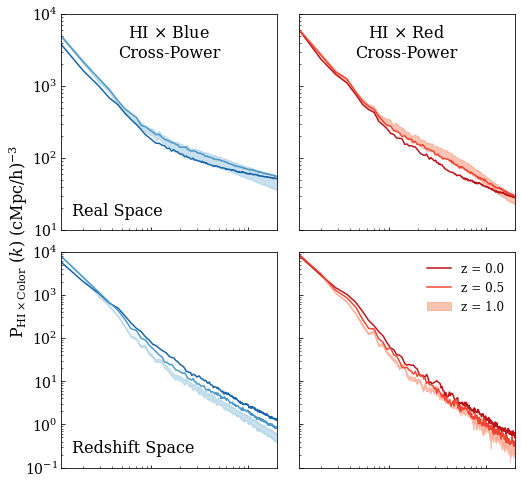

In [19]:
def fill_mean(ax, data, kwargs):
    x = data[0]
    y = np.mean(np.array([data[1], data[2]]), axis = 0)
    kwargs['alpha'] = 1
    ax.plot(x, y, **kwargs)
    return

ip = {'is_auto':False, 'space':['real', 'redshift'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['blue', 'red'], 'post_process':'no key found', 'simname':'tng100',
     'snapshot':[99, 67, 50]}
fg = ds.figrid('snapshot', 'space', 'color', ip)
snapshots = ds.getAttrVals('snapshot')
snapshots.sort()
cmaps = {'blue':'Blues', 'red':'Reds'}
for col in ['blue', 'red']:
    fg.setCmap(cmaps[col], snapshots, {'color':col})

fg.autoFill()
fg.setFunc({'figrid_process':'fill', 'snapshot':67}, fill_mean)
fg.setFunc({'figrid_process':'fill', 'snapshot':99}, fill_mean)
fg.plotArgs({'figrid_process':'fill', 'snapshot':50}, alpha = 0.5)
fg.axisArgs(slc = 'real', ylim = (10, 1e4))
fg.axisArgs(slc = 'redshift', ylim = (.1, 1e4))
fg.tickArgs(slc = 'red', labelleft = False)
XBORDER = [0.25, 0.1]
YBORDER = [0.25, 0.1]
fg.gspecArgs(xborder = XBORDER, yborder = YBORDER, wspace = 0.1, hspace = 0.1)
fg.tickArgs(labelbottom = False)
fg.setYLabel(pplib.pklab('HI', 'Color'))
fg.setXLabel('')
fg.plot()

The row values for : ['no key found']
The column values for color: ['blue', 'red']


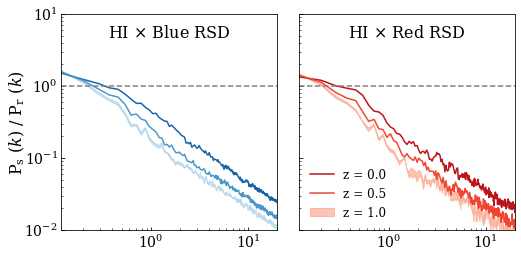

In [20]:
ip = {'is_auto':False, 'space':['real', 'redshift'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['blue', 'red'], 'post_process':'no key found', 'simname':'tng100',
     'snapshot':[99, 67, 50]}
rsdfg = ds.figrid('snapshot', '', 'color', ip)
rsdfg.autoNorm({'space':'real'}, ['model', 'HI_fieldname', 'color', 'snapshot'])
rsdfg.row_labels = ['']
snapshots = ds.getAttrVals('snapshot')
snapshots.sort()
for col in ['blue', 'red']:
    rsdfg.setCmap(cmaps[col], snapshots, {'color':col})
rsdfg.col_labels = ['HI $\\times$ Blue RSD', 'HI $\\times$ Red RSD']
rsdfg.autoFill()
rsdfg.setFunc({'figrid_process':'fill', 'snapshot':67}, fill_mean)
rsdfg.setFunc({'figrid_process':'fill', 'snapshot':99}, fill_mean)
rsdfg.plotArgs({'figrid_process':'fill', 'snapshot':50}, alpha = 0.5)
rsdfg.setXLabel('')

rsdfg.axisArgs(ylim = (.01, 10))
rsdfg.setDefaultTicksParams()
rsdfg.plotOnes()
rsdfg.setYLabel(pplib.pkrat('s', 'r'))
rsdfg.legendArgs(loc = 'lower left')
rsdfg.colLabels([r'HI $\times$ Blue RSD', r'HI $\times$ Red RSD'])
rsdfg.gspecArgs(wspace = 0.1, xborder = XBORDER, yborder = [0.1, 0.25])
rsdfg.plot()

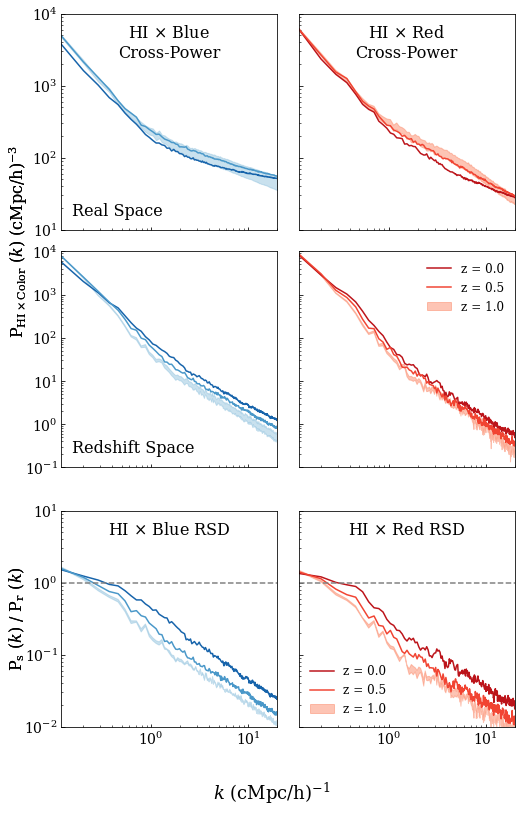

In [21]:
figarr = np.empty((2, 1), dtype = object)
figarr[0,0] = fg; figarr[1, 0] = rsdfg
fig = fg.combine(figarr)
fig.text(0.5, 0, pplib.wnum(), ha = 'center', va = 'top', fontsize = 18)
fig.savefig(DRAFTPATH + 'rvb_zevo_center_line.pdf', dpi = 150, bbox_inches = 'tight')
fig.savefig(SAVEPATH + 'rvb_zevo_center_line.png', dpi = 150, bbox_inches = 'tight')

## Presentation Figures

The row values for : ['no key found']
The column values for color: ['blue']


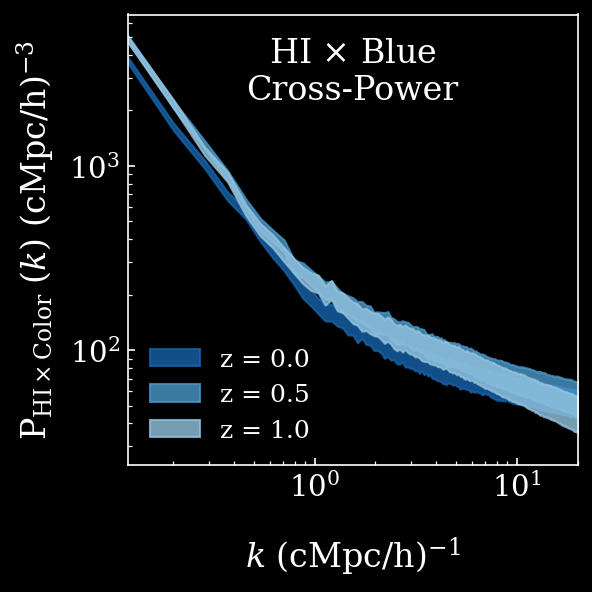

In [28]:
ip = {'is_auto':False, 'space':['real'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['blue'], 'post_process':'no key found', 'simname':'tng100',
     'snapshot':[99, 67, 50]}
fg = ds.figrid('snapshot', '', 'color', ip)
fg.figArgs(dpi = 150)
snapshots = ds.getAttrVals('snapshot')
snapshots.sort()
cmaps = {'blue':'Blues', 'red':'Reds'}
for col in ['blue', 'red']:
    fg.setCmap(cmaps[col], snapshots, {'color':col})

fg.autoFill(alpha = 0.8)
fg.axisArgs(slc = 'real', ylim = (10, 1e4))
XBORDER = [0.25, 0.1]
YBORDER = [0.25, 0.25]
fg.gspecArgs(xborder = XBORDER, yborder = YBORDER, wspace = 0.5, hspace = 0.5)
fg.legendArgs(loc = 'lower left')
fg.setYLabel(pplib.pklab('HI', 'Color'))
pplib.darkmode(fg)
fg.plot()

The row values for : ['no key found']
The column values for : ['no key found']


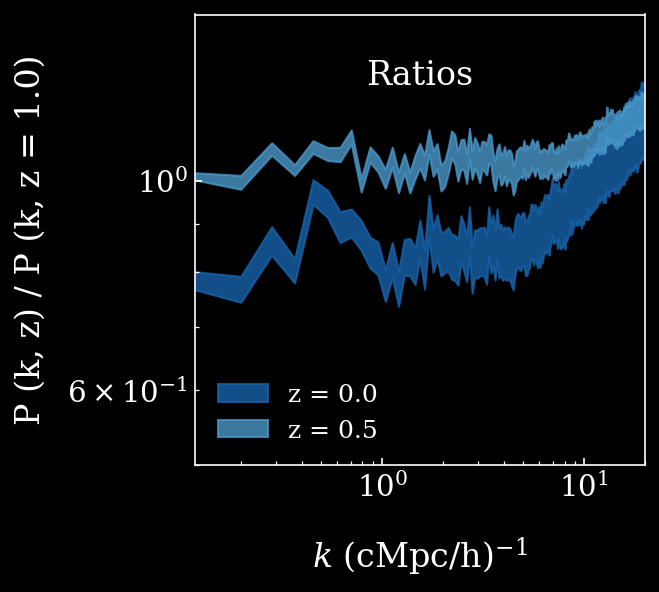

In [29]:
ip = {'is_auto':False, 'space':['real'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['blue'], 'post_process':'no key found', 'simname':'tng100',
     'snapshot':[99, 67, 50]}
fg = ds.figrid('snapshot', '', '', ip)
fg.figArgs(dpi = 150)
snapshots = ds.getAttrVals('snapshot')
snapshots.sort()
cmaps = {'blue':'Blues', 'red':'Reds'}
for col in ['blue', 'red']:
    fg.setCmap(cmaps[col], snapshots, {'color':col})
fg.autoNorm({'snapshot':50}, ['model'])
fg.autoFill(alpha = 0.8)
fg.axisArgs(ylim = (0.5, 1.5))
fg.colLabels(['Ratios'])
fg.colLabelArgs(fontsize = 16)
XBORDER = [0.4, 0.1]
YBORDER = [0.25, 0.25]
fg.gspecArgs(xborder = XBORDER, yborder = YBORDER, wspace = 0.5, hspace = 0.5)
fg.legendArgs(loc = 'lower left')
fg.setYLabel('P (k, z) / P (k, z = 1.0)')

pplib.darkmode(fg)
fg.plot()

The row values for : ['no key found']
The column values for color: ['red']


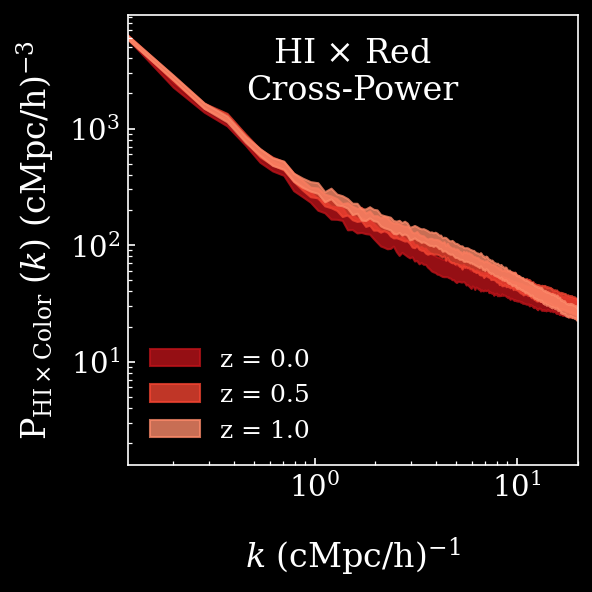

In [30]:
ip = {'is_auto':False, 'space':['real'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['red'], 'post_process':'no key found', 'simname':'tng100',
     'snapshot':[99, 67, 50]}
fg = ds.figrid('snapshot', '', 'color', ip)
fg.figArgs(dpi = 150)
snapshots = ds.getAttrVals('snapshot')
snapshots.sort()
cmaps = {'blue':'Blues', 'red':'Reds'}
for col in ['blue', 'red']:
    fg.setCmap(cmaps[col], snapshots, {'color':col})

fg.autoFill(alpha = 0.8)
fg.axisArgs(slc = 'real', ylim = (10, 1e4))
XBORDER = [0.25, 0.1]
YBORDER = [0.25, 0.25]
fg.gspecArgs(xborder = XBORDER, yborder = YBORDER, wspace = 0.5, hspace = 0.5)
fg.legendArgs(loc = 'lower left')
fg.setYLabel(pplib.pklab('HI', 'Color'))
pplib.darkmode(fg)
fg.plot()

The row values for : ['no key found']
The column values for : ['no key found']


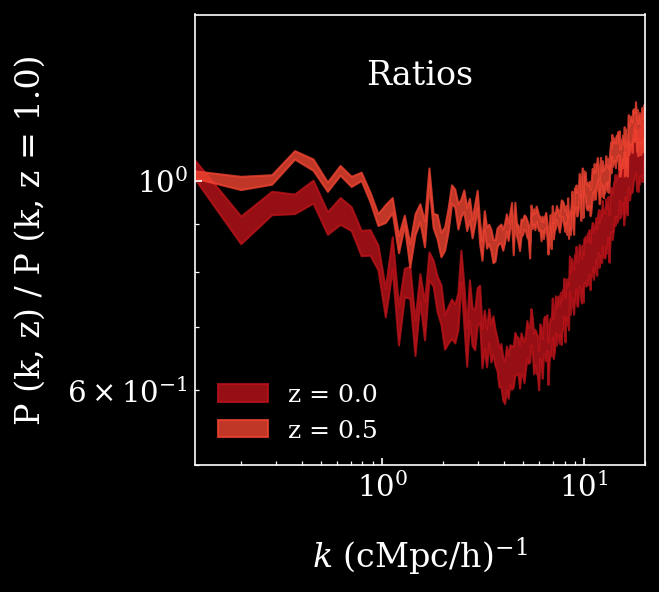

In [31]:
ip = {'is_auto':False, 'space':['real'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['red'], 'post_process':'no key found', 'simname':'tng100',
     'snapshot':[99, 67, 50]}
fg = ds.figrid('snapshot', '', '', ip)
fg.figArgs(dpi = 150)
snapshots = ds.getAttrVals('snapshot')
snapshots.sort()
cmaps = {'blue':'Blues', 'red':'Reds'}
for col in ['blue', 'red']:
    fg.setCmap(cmaps[col], snapshots, {'color':col})
fg.autoNorm({'snapshot':50}, ['model'])
fg.autoFill(alpha = 0.8)
fg.axisArgs(ylim = (0.5, 1.5))
fg.colLabels(['Ratios'])
fg.colLabelArgs(fontsize = 16)
XBORDER = [0.4, 0.1]
YBORDER = [0.25, 0.25]
fg.gspecArgs(xborder = XBORDER, yborder = YBORDER, wspace = 0.5, hspace = 0.5)
fg.legendArgs(loc = 'lower left')
fg.setYLabel('P (k, z) / P (k, z = 1.0)')

pplib.darkmode(fg)
fg.plot()

# Papastergis Comparison

In [40]:
ds = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/10-27_datasort.pkl', 'rb'))

KeyboardInterrupt: 